In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [42]:
sns.set_theme()

In [43]:
df = pd.read_csv('./train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
Y_train = to_categorical(df['label'].to_numpy())
df.drop(columns=['label'], inplace=True)
X_train = df.to_numpy().reshape(42000, 28, 28)

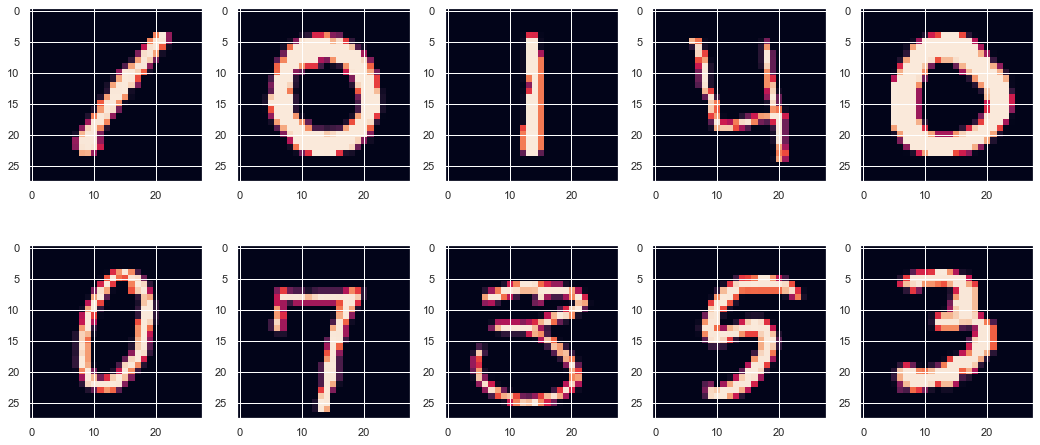

In [45]:
k = 0
fig, axes = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(18)
for i in range(2):
    for j in range(5):
        axes[i,j].imshow(X_train[k])
        k += 1

In [46]:
X_train = X_train / 255.

In [47]:
X_train = np.expand_dims(X_train, axis=3)

In [48]:
model = Sequential([
    Conv2D(48, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)),
    MaxPool2D((2,2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)),
    MaxPool2D((2,2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 48)        480       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 48)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        27712     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
info = model.fit(X_train, Y_train, batch_size=128, validation_split=0.2, epochs=3)

Epoch 1/3
263/263 [==============================] - 14s 53ms/step - loss: 0.2874 - accuracy: 0.9130 - val_loss: 0.0803 - val_accuracy: 0.9754
Epoch 2/3
263/263 [==============================] - 14s 52ms/step - loss: 0.0642 - accuracy: 0.9803 - val_loss: 0.0621 - val_accuracy: 0.9799
Epoch 3/3
263/263 [==============================] - 14s 51ms/step - loss: 0.0451 - accuracy: 0.9862 - val_loss: 0.0473 - val_accuracy: 0.9860


<AxesSubplot:>

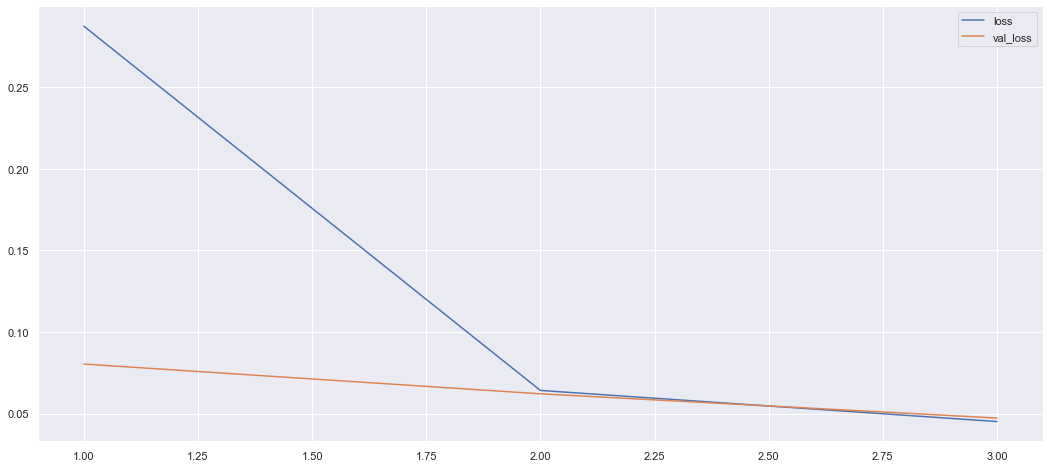

In [52]:
plt.figure(figsize=(18,8))
sns.lineplot(x=range(1,4), y=info.history['loss'], label='loss')
sns.lineplot(x=range(1,4), y=info.history['val_loss'], label='val_loss')

<AxesSubplot:>

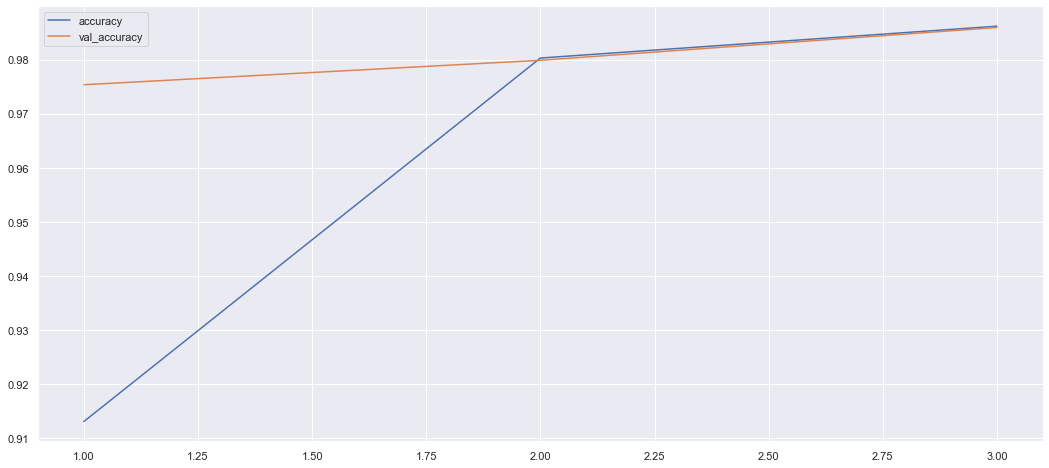

In [53]:
plt.figure(figsize=(18,8))
sns.lineplot(x=range(1,4), y=info.history['accuracy'], label='accuracy')
sns.lineplot(x=range(1,4), y=info.history['val_accuracy'], label='val_accuracy')

In [63]:
test_df = pd.read_csv('./test.csv')
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
X_test = test_df.to_numpy().reshape(28000, 28, 28, 1) / 255.

In [66]:
Y_test = model.predict(X_test)
Y_test = np.argmax(Y_test, axis=1).reshape(-1)

In [67]:
final_df = pd.DataFrame({
    'ImageId': range(1, 28001),
    'Label': Y_test
})

In [68]:
final_df.to_csv('./submission.csv', index=False)